### Load the packages and functions

In [1]:
%run artifactpackage.ipynb
%run Confusionmatrix.ipynb
%run masrur_ploting_utils.ipynb

2023-10-25 03:50:03.864829: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-25 03:50:03.866293: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-25 03:50:03.898533: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-25 03:50:03.899037: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-25 03:50:04.517595: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

### Load the training and test datasets

In [2]:
dr = pd.read_csv('/media/masharifin/D Drive/ComprehensiveExam/Datasets/CIC-Malmem/New/newcicresampled-smote.csv')
dr['Class'] = dr['Class'].replace({'Benign': 0, 'Malware': 1})
dr

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,apihooks.nhooks,apihooks.nhooksInline,apihooks.nhooksUsermode,Class
0,54,17,19.111111,0,-0.055556,3052,56.518519,21894,437.880000,0,...,0,0,0,49,1,19,38958,38672,38805,1
1,51,14,21.000000,0,-0.039216,3048,59.764706,21760,453.333333,0,...,0,0,0,48,1,20,37501,37204,37348,1
2,58,17,19.017241,0,-0.051724,3140,54.137931,19673,364.314815,0,...,0,0,0,40,0,17,36283,36038,36130,1
3,83,26,19.855422,0,-0.060241,4200,50.602410,3963,52.144737,0,...,0,0,0,40,0,17,40675,40262,40522,1
4,50,16,16.900000,0,-0.040000,2878,57.560000,17711,376.829787,0,...,0,0,0,44,1,18,33353,33116,33200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,67,22,3028.814201,0,-0.059500,3191,49.268511,27074,436.688368,0,...,0,0,0,46,0,19,22990,22752,22861,1
58592,63,20,19.338365,0,-0.056538,3502,55.457282,23073,387.917384,0,...,0,0,0,51,0,21,39248,38957,39095,1
58593,70,20,17.508938,0,-0.042491,3485,49.884989,23146,353.198812,0,...,0,0,0,51,0,21,37414,36833,37261,1
58594,73,22,15.585836,0,-0.054515,3047,45.028320,26234,400.605471,0,...,0,0,0,45,0,17,20050,19900,19920,1


In [3]:
dc = pd.read_csv('/media/masharifin/D Drive/ComprehensiveExam/Datasets/CIC-Malmem/ObfuscatedMalMem2022.csv')
dc['Class'] = dr['Class'].replace({'Benign': 0, 'Malware': 1})
dc

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,...,221,26,24,116,0,121,87,0,8,1
1,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,...,222,26,24,118,0,122,87,0,8,1
2,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,...,222,26,27,118,0,120,88,0,8,1
3,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,...,222,26,27,118,0,120,88,0,8,1
4,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,...,222,26,24,118,0,124,87,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,0,...,221,26,24,116,0,120,86,0,8,1
58592,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,0,...,221,26,24,116,0,116,88,0,8,1
58593,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,0,...,221,26,24,116,0,120,88,0,8,1
58594,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,0,...,221,26,24,116,0,120,87,0,8,1


In [4]:
# # List of columns to drop
# columns_to_drop_dc = ['ldrmodules.not_in_init_avg', 'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_mem_avg']
# # Drop the specified columns
# dc.drop(columns=columns_to_drop_dc, inplace=True)
# dc.info()

In [5]:
# # List of columns to drop
# columns_to_drop_dr = ['apihooks.nhooks', 'apihooks.nhooksInline', 'apihooks.nhooksUsermode']
# # Drop the specified columns
# dr.drop(columns=columns_to_drop_dr, inplace=True)
# dr.info()

In [6]:
features = dc.drop('Class', axis=1).values
Class = dc['Class'].values
X_train=dc.drop(columns='Class')
y_train=dc['Class']

In [7]:
features = dr.drop('Class', axis=1).values
Class = dr['Class'].values
X_test=dr.drop(columns='Class')
y_test=dr['Class']

## Machine learning Model Build 

### Model_1: Decision Tree

In [8]:
Dt_classifier= DecisionTreeClassifier(random_state=29)
Dt_classifier.fit(X_train, y_train)

# Predict on training and test sets
y_pred_train_dt = Dt_classifier.predict(X_train)
y_pred_test_dt = Dt_classifier.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)

print(f"Training Accuracy: {accuracy_train_dt}")
print(f"Test Accuracy: {accuracy_test_dt}")

Training Accuracy: 1.0
Test Accuracy: 0.9987883131954399


/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)


In [9]:
filename_dt= 'Binary_security_dt_sm.sav'
pickle.dump(Dt_classifier, open(filename_dt, 'wb'))
load_model_dt=pickle.load(open('Binary_security_dt_sm.sav','rb'))
load_pred_dt=load_model_dt.predict(X_test)

/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)


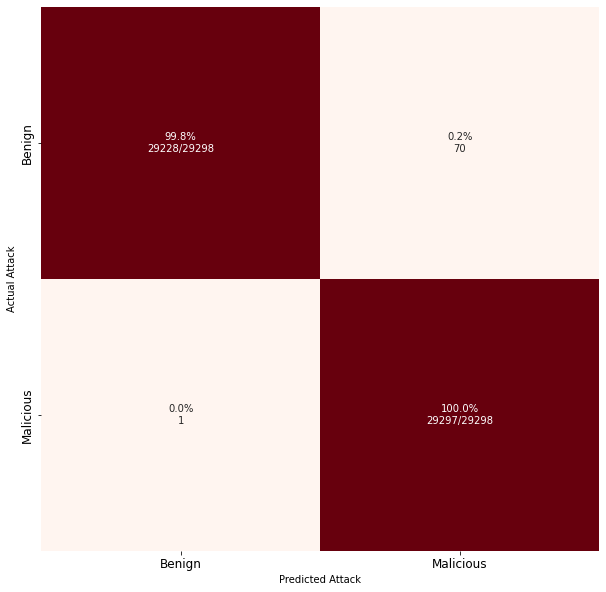

In [10]:
plot_cm(y_test, load_pred_dt)
plt.savefig('cm.eps',dpi=600)

                                   Feature  Importance
44                svcscan.process_services    0.977733
47                         svcscan.nactive    0.006772
8             handles.avg_handles_per_proc    0.004539
7                         handles.nhandles    0.001764
51                         apihooks.nhooks    0.001168
11                          handles.nevent    0.000965
27            psxview.not_in_eprocess_pool    0.000850
23                     malfind.ninjections    0.000832
2                       pslist.avg_threads    0.000769
4                      pslist.avg_handlers    0.000672
10                           handles.nfile    0.000552
14                         handles.nthread    0.000498
13                            handles.nkey    0.000250
1                             pslist.nppid    0.000249
24                    malfind.commitCharge    0.000244
25                      malfind.protection    0.000236
32                 psxview.not_in_deskthrd    0.000178
20        

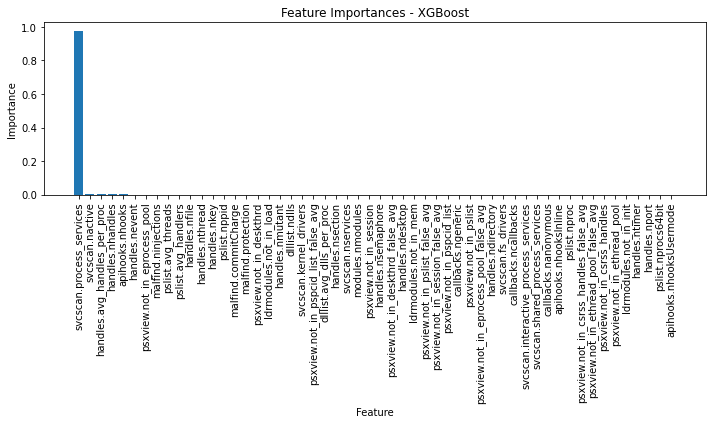

In [11]:
# Get the feature importance scores from the trained Decision Tree model
feature_importance = Dt_classifier.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features with their importance scores
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - XGBoost')
plt.tight_layout()
plt.show()

In [12]:
# Initialize  model
Dt_classifier = DecisionTreeClassifier(random_state=29)

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(Dt_classifier, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Score: 1.0
Standard Deviation: 0.0


### Model_2: Random forest

In [13]:
rf_classifier=RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)
y_pred_rf=rf_classifier.predict(X_test)
# Predict on training and test sets
y_pred_train_rf = rf_classifier.predict(X_train)
y_pred_test_rf = rf_classifier.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

print(f"Training Accuracy: {accuracy_train_rf}")
print(f"Test Accuracy: {accuracy_test_rf}")

/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)
/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)


Training Accuracy: 1.0
Test Accuracy: 0.9988053792067718


In [14]:
filename_rf= 'Binary_security_rf_sm.sav'
pickle.dump(rf_classifier, open(filename_rf, 'wb'))
load_model_dt=pickle.load(open('Binary_security_rf_sm.sav','rb'))
load_pred_rf=load_model_dt.predict(X_test)

/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)


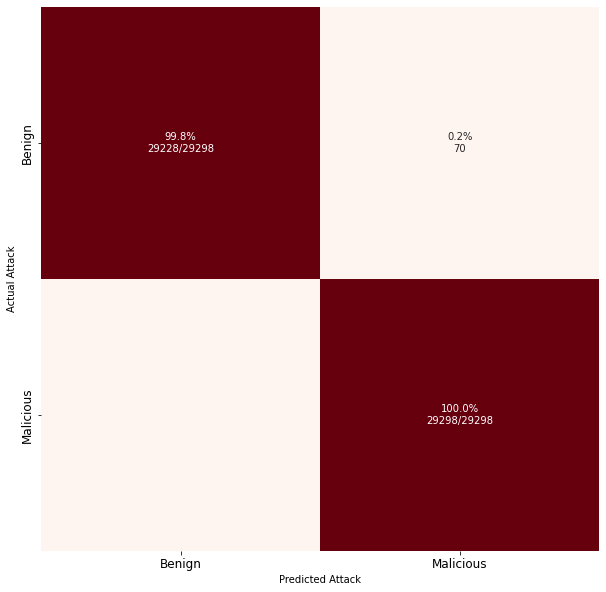

In [15]:
plot_cm(y_test, load_pred_rf)
plt.savefig('cm.eps',dpi=600)

                                   Feature    Importance
45         svcscan.shared_process_services  1.100054e-01
44                svcscan.process_services  1.077844e-01
18                        handles.nsection  1.057246e-01
19                         handles.nmutant  9.896573e-02
6                dlllist.avg_dlls_per_proc  8.773199e-02
48                    callbacks.ncallbacks  7.700445e-02
5                            dlllist.ndlls  7.273745e-02
8             handles.avg_handles_per_proc  5.790860e-02
11                          handles.nevent  4.857250e-02
13                            handles.nkey  4.727236e-02
7                         handles.nhandles  2.898618e-02
16                      handles.nsemaphore  2.767056e-02
22                   ldrmodules.not_in_mem  2.547745e-02
4                      pslist.avg_handlers  2.154359e-02
10                           handles.nfile  1.702536e-02
47                         svcscan.nactive  1.470931e-02
27            psxview.not_in_ep

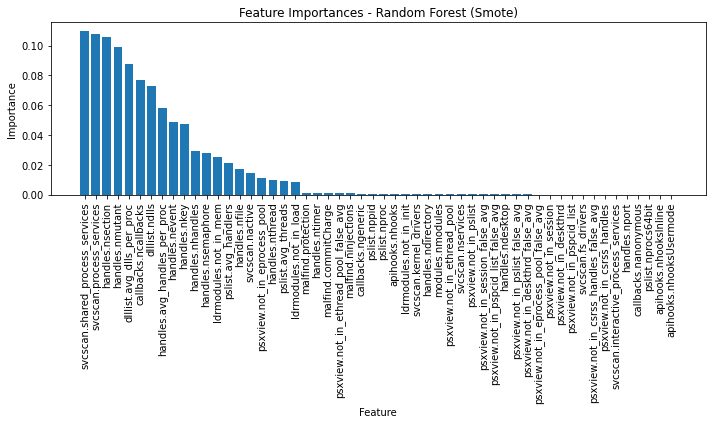

In [16]:
# Get the feature importance scores from the trained Random Forest model
feature_importance = rf_classifier.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features with their importance scores
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - Random Forest (Smote)')
plt.tight_layout()
plt.show()

In [17]:
# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(rf_classifier, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Score: 1.0
Standard Deviation: 0.0


### Model_3: LGBM

In [18]:
lgb_nor=lgb.LGBMClassifier(n_jobs= -1)
lgb_nor.fit(X_train,y_train)
y_pred_lgbm =lgb_nor.predict(X_test)
print(y_pred_lgbm)
cohen_kappa_score(y_test,y_pred_lgbm)

[1 1 1 ... 1 1 1]


0.9992149634787357

In [19]:
# Predict on training and test sets
y_pred_train_lgb = lgb_nor.predict(X_train)
y_pred_test_lgb = lgb_nor.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_lgb = accuracy_score(y_train, y_pred_train_lgb)
accuracy_test_lgb = accuracy_score(y_test, y_pred_test_lgb)

print(f"Training Accuracy: {accuracy_train_lgb}")
print(f"Test Accuracy: {accuracy_test_lgb}")

Training Accuracy: 0.9987883131954399
Test Accuracy: 0.9996074817393679


In [20]:
print("",classification_report(y_test,y_pred_lgbm))

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29298
           1       1.00      1.00      1.00     29298

    accuracy                           1.00     58596
   macro avg       1.00      1.00      1.00     58596
weighted avg       1.00      1.00      1.00     58596



In [21]:
accuracy = lgb_nor.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9996074817393679


In [22]:
filename_lgbm= 'Binary_security_lgbm_rm.sav'
pickle.dump(lgb_nor, open(filename_lgbm, 'wb'))
load_model_lgbm=pickle.load(open('Binary_security_lgbm_sm.sav','rb'))
load_pred_lgbm=load_model_lgbm.predict(X_test)

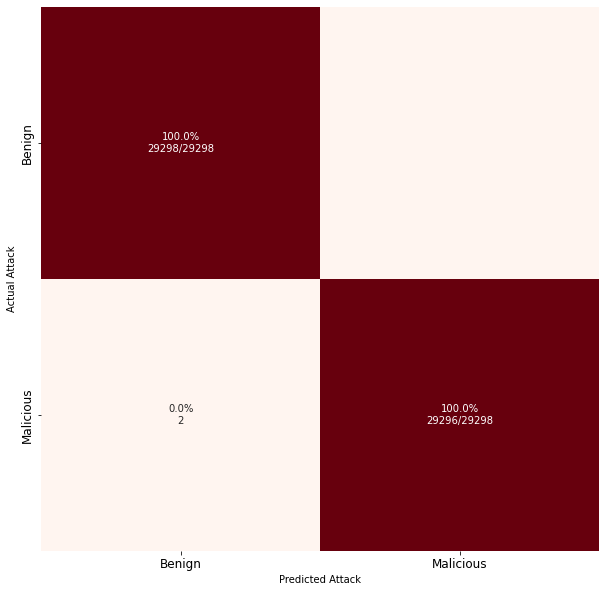

In [23]:
plot_cm(y_test, load_pred_lgbm)
plt.savefig('cm.eps',dpi=600)

                                   Feature    Importance
45         svcscan.shared_process_services  1.100054e-01
44                svcscan.process_services  1.077844e-01
18                        handles.nsection  1.057246e-01
19                         handles.nmutant  9.896573e-02
6                dlllist.avg_dlls_per_proc  8.773199e-02
48                    callbacks.ncallbacks  7.700445e-02
5                            dlllist.ndlls  7.273745e-02
8             handles.avg_handles_per_proc  5.790860e-02
11                          handles.nevent  4.857250e-02
13                            handles.nkey  4.727236e-02
7                         handles.nhandles  2.898618e-02
16                      handles.nsemaphore  2.767056e-02
22                   ldrmodules.not_in_mem  2.547745e-02
4                      pslist.avg_handlers  2.154359e-02
10                           handles.nfile  1.702536e-02
47                         svcscan.nactive  1.470931e-02
27            psxview.not_in_ep

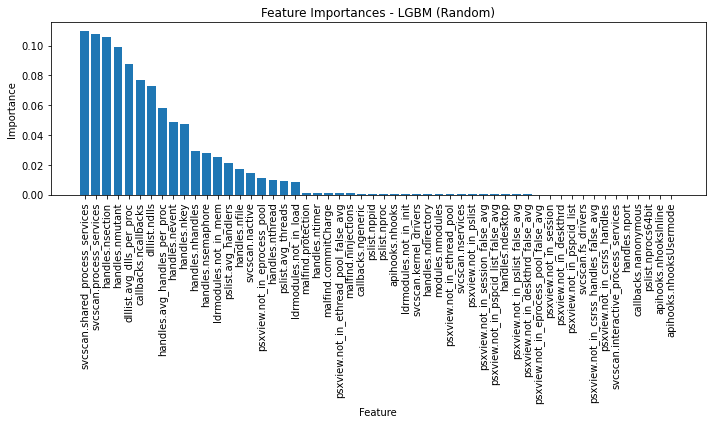

In [24]:
# Get the feature importance scores from the trained LGBM model
feature_importance = lgb_nor.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_lgb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_lgb = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features with their importance scores
print(feature_importance_lgb)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - LGBM (Random)')
plt.tight_layout()
plt.show()

In [25]:
# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(lgb_nor, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Score: 1.0
Standard Deviation: 0.0


### Model_4: GaussianNB

In [26]:
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predict on training and test sets
y_pred_train_nb = nb_classifier.predict(X_train)
y_pred_test_nb = nb_classifier.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_nb = accuracy_score(y_train, y_pred_train_nb)
accuracy_test_nb = accuracy_score(y_test, y_pred_test_nb)

print(f"Training Accuracy: {accuracy_train_nb}")
print(f"Test Accuracy: {accuracy_test_nb}")

Training Accuracy: 0.9894873370195918
Test Accuracy: 0.9939586319885316


/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)


In [27]:
filename_nb= 'Binary_security_nb_sm.sav'
pickle.dump(nb_classifier, open(filename_nb, 'wb'))
load_model_nb=pickle.load(open('Binary_security_nb_rm.sav','rb'))
load_pred_nb=load_model_nb.predict(X_test)

/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)


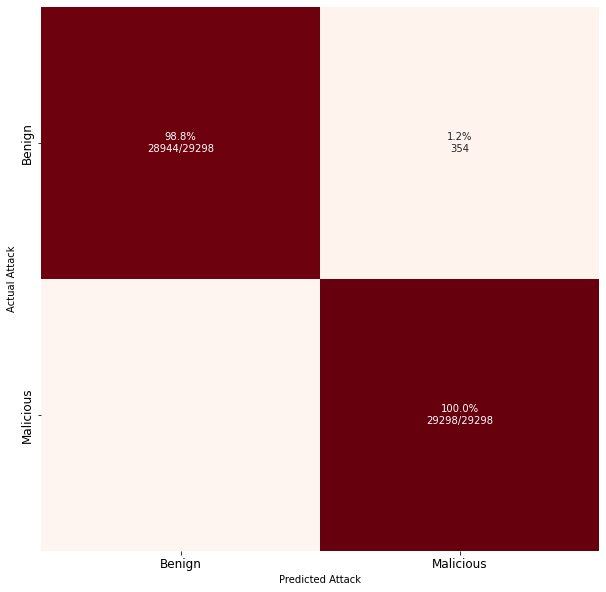

In [28]:
plot_cm(y_test, load_pred_nb)
plt.savefig('cm.eps',dpi=600)

In [29]:
# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(nb_classifier, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Score: 1.0
Standard Deviation: 0.0


# ROC 

In [44]:
# Fit the classifiers with training data
Dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
lgb_nor.fit(X_train, y_train)

LGBMClassifier()

In [45]:
proba_df = pd.DataFrame({
       
    'DECISIONTREE':Dt_classifier.predict_proba(X_test)[:,1],
    'RANDOMFORREST':rf_classifier.predict_proba(X_test)[:,1],
    'LGBM':lgb_nor.predict_proba(X_test)[:,1],
    'NB':nb_classifier.predict_proba(X_test)[:,1],
    })
proba_df

/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)
/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)
/home/masharifin/.local/lib/python3.10/s

,DECISIONTREE,RANDOMFORREST,LGBM,NB
0,1.0,0.66,0.985908,1.0
1,1.0,0.67,0.985102,1.0
2,1.0,0.69,0.988607,1.0
3,1.0,0.76,0.999023,1.0
4,1.0,0.69,0.996804,1.0
...,...,...,...,...
58591,1.0,0.65,0.937132,1.0
58592,1.0,0.70,0.988607,1.0
58593,1.0,0.70,0.994767,1.0
58594,1.0,0.66,0.976217,1.0


In [46]:
proba_df.to_csv('probability.csv')

DECISIONTREE
  AUC: 0.999
RANDOMFORREST
  AUC: 0.999
LGBM
  AUC: 1.0
NB
  AUC: 0.995


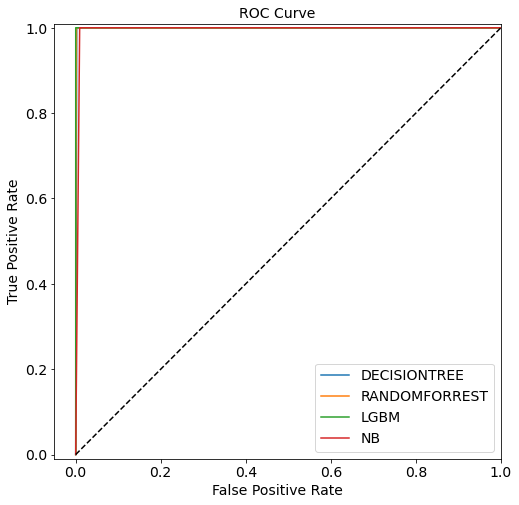

In [47]:
filename_ROC='ROC_curve_Binary_security.png'
plot_roc_curves(proba_df, y_test,filename_ROC)

# Performance Metrics

In [48]:
#estimator and names fuction
def est(clf,names):
    estm=[]
    for i in range(len(clf)):
        n=names[i]
        claf=clf[i]
        estm.append((n,claf))
    return estm
clf=[Dt_classifier,rf_classifier,lgb_nor,nb_classifier]
name=['DecisionTree','RandomForest','LightGBM','NB']
est_1=est(clf,name)

In [49]:
cross_val_scores = {}
accuracy_scores = {}
error_scores = {}
f1_scores = {}
fpr_scores = {}
kappa_scores = {}
mcc_scores = {}
ppv_scores = {}
sensitivity_scores = {}
specificity_scores = {}
auc_scores = {}
y_preds = {}
y_probs = {}
threat_scores = {}
balanced_accuracy_scores = {}


for algorithm, model in est_1:
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    y_preds[algorithm] = y_pred
    y_probs[algorithm] = y_prob
    
    cross_val_scores[algorithm] = cross_val_score(model, X_train, y_train, cv=10).mean()
    accuracy_scores[algorithm] = accuracy_score(y_test, y_pred)
    error_scores[algorithm] = 1 - accuracy_scores[algorithm]
    f1_scores[algorithm] = f1_score(y_test, y_pred, average="weighted")
    kappa_scores[algorithm] = cohen_kappa_score(y_test, y_pred)
    mcc_scores[algorithm] = matthews_corrcoef(y_test, y_pred)
    ppv_scores[algorithm] = precision_score(y_test, y_pred, average="weighted")
    sensitivity_scores[algorithm] = recall_score(y_test, y_pred, average="weighted")
    confusion_matrix_= confusion_matrix(y_test, y_pred)
    FP = confusion_matrix_.sum(axis=0) - np.diag(confusion_matrix_)  
    FN = confusion_matrix_.sum(axis=1) - np.diag(confusion_matrix_)
    TP = np.diag(confusion_matrix_)
    TN = confusion_matrix_.sum() - (FP + FN + TP)
    fpr_scores[algorithm] = (FP/(FP+TN)).mean()
    specificity_scores[algorithm] = (TN/(TN+FP)).mean()
    threat_scores[algorithm] = (TP/(TP+FN+FP)).mean()
    balanced_accuracy_scores[algorithm] = ((sensitivity_scores[algorithm] + specificity_scores[algorithm])/2).mean()
    print('done for one')


/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)
/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)


done for one


/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)
/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)


done for one
done for one


/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)
/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)


done for one


In [50]:
performance_metrics = {
    'cross_val_scores': cross_val_scores,
    'accuracy_scores': accuracy_scores,
    'error_scores': error_scores,
    'f1_scores': f1_scores,
    'fpr_scores': fpr_scores,
    'kappa_scores': kappa_scores,
    'mcc_scores': mcc_scores,
    'ppv_scores': ppv_scores,
    'sensitivity_scores': sensitivity_scores,
    'specificity_scores': specificity_scores,
    'threat_scores': threat_scores,
    'balanced_accuracy_scores': balanced_accuracy_scores
}

pd.DataFrame(performance_metrics)

,cross_val_scores,accuracy_scores,error_scores,f1_scores,fpr_scores,kappa_scores,mcc_scores,ppv_scores,sensitivity_scores,specificity_scores,threat_scores,balanced_accuracy_scores
DecisionTree,0.993617,0.998788,0.001212,0.998788,0.001212,0.997577,0.997579,0.998791,0.998788,0.998788,0.997580,0.998788
RandomForest,0.996263,0.998805,0.001195,0.998805,0.001195,0.997611,0.997614,0.998808,0.998805,0.998805,0.997614,0.998805
LightGBM,0.996177,0.999607,0.000393,0.999607,0.000393,0.999215,0.999215,0.999608,0.999607,0.999607,0.999215,0.999607
NB,0.989095,0.993959,0.006041,0.993958,0.006041,0.987917,0.987989,0.994031,0.993959,0.993959,0.987989,0.993959


In [51]:
perfo_m=pd.DataFrame(performance_metrics)
perfo_m.to_csv('performance_metrics_smote.csv')

## Deep learning Model Build 

### Model_5:ANN

In [30]:
# Create the ANN model
model_ann = Sequential()

# Add layers to the model
model_ann.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model_ann.add(Dense(units=32, activation='relu'))
model_ann.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_ann.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
1648/1648 [==============================] - 2s 985us/step - loss: 2.2098 - accuracy: 0.9370 - val_loss: 0.0452 - val_accuracy: 0.9971
Epoch 2/10
1648/1648 [==============================] - 1s 886us/step - loss: 1.1265 - accuracy: 0.9711 - val_loss: 0.0752 - val_accuracy: 0.9968
Epoch 3/10
1648/1648 [==============================] - 1s 897us/step - loss: 0.7468 - accuracy: 0.9766 - val_loss: 0.0570 - val_accuracy: 0.9962
Epoch 4/10
1648/1648 [==============================] - 1s 878us/step - loss: 0.7810 - accuracy: 0.9755 - val_loss: 0.0777 - val_accuracy: 0.9916
Epoch 5/10
1648/1648 [==============================] - 1s 883us/step - loss: 0.5105 - accuracy: 0.9801 - val_loss: 9.0467e-09 - val_accuracy: 1.0000
Epoch 6/10
1648/1648 [==============================] - 2s 936us/step - loss: 0.3722 - accuracy: 0.9837 - val_loss: 0.0012 - val_accuracy: 0.9997
Epoch 7/10
1648/1648 [==============================] - 2s 943us/step - loss: 0.2372 - accuracy: 0.9847 - val_loss: 0.00

In [31]:
 # Evaluate the model on the test set
loss, accuracy_ann = model_ann.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy_ann:.5f}')

1832/1832 [==============================] - 1s 668us/step - loss: 13620.8496 - accuracy: 0.9567
Test accuracy: 0.95669


1832/1832 [==============================] - 1s 594us/step


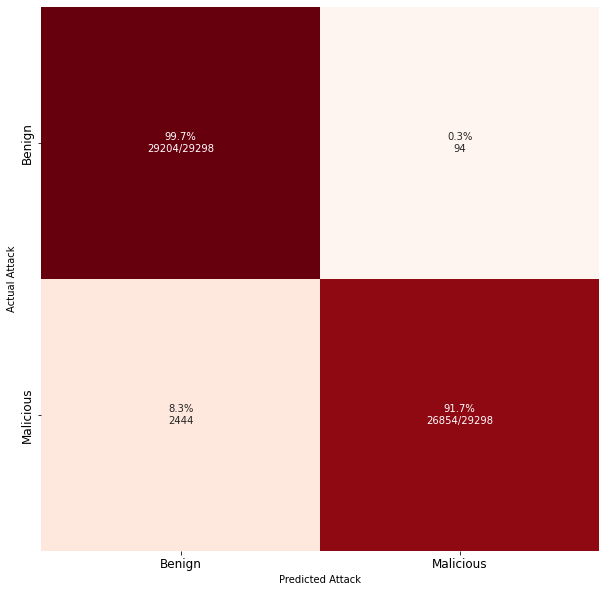

In [32]:
# Save the ANN model to disk
model_ann.save('Binary_security_ann_sm.keras')

# Load the saved ANN model
load_model_ann = load_model('Binary_security_ann_sm.keras')

# Predict using the loaded ANN model
load_pred_ann = load_model_ann.predict(X_test)
load_pred_ann_classes = (load_pred_ann > 0.5).astype(int)  # Convert probabilities to binary classes

plot_cm(y_test, load_pred_ann_classes)
plt.savefig('cm.eps', dpi=600)

### Model_7:CNN

In [33]:
# Normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape X_train and X_test to be 3D tensors for CNN
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Create the CNN model
model_cnn = Sequential()

# Add convolutional layers
model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))

model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))

# Add fully connected layers
model_cnn.add(Flatten())
model_cnn.add(Dense(units=128, activation='relu'))
model_cnn.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_cnn.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy_cnn = model_cnn.evaluate(X_test_reshaped, y_test)
print(f'Test accuracy: {accuracy_cnn:.4f}')


Epoch 1/10


/home/masharifin/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- apihooks.nhooks
- apihooks.nhooksInline
- apihooks.nhooksUsermode
Feature names seen at fit time, yet now missing:
- ldrmodules.not_in_init_avg
- ldrmodules.not_in_load_avg
- ldrmodules.not_in_mem_avg

  warnings.warn(message, FutureWarning)


1648/1648 [==============================] - 5s 3ms/step - loss: 0.0322 - accuracy: 0.9943 - val_loss: 0.0154 - val_accuracy: 0.9993
Epoch 2/10
1648/1648 [==============================] - 4s 3ms/step - loss: 0.0216 - accuracy: 0.9964 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 3/10
1648/1648 [==============================] - 4s 3ms/step - loss: 0.0202 - accuracy: 0.9968 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 4/10
1648/1648 [==============================] - 4s 3ms/step - loss: 0.0189 - accuracy: 0.9970 - val_loss: 0.0028 - val_accuracy: 0.9993
Epoch 5/10
1648/1648 [==============================] - 4s 2ms/step - loss: 0.0192 - accuracy: 0.9971 - val_loss: 7.5818e-04 - val_accuracy: 1.0000
Epoch 6/10
1648/1648 [==============================] - 4s 2ms/step - loss: 0.0172 - accuracy: 0.9971 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 7/10
1648/1648 [==============================] - 4s 2ms/step - loss: 0.0166 - accuracy: 0.9972 - val_loss: 0.0044 - val_accuracy: 0.9995

### FGSM Attack On CNN

In [34]:
# Save the model to an keras file
model_cnn.save('smote-malmemcnn.keras')

In [35]:
# FGSM Attack
epsilon = 103 # Perturbation magnitude

def fgsm_attack(input_image, epsilon, gradient):
    perturbed_image = input_image + epsilon * tf.sign(gradient)
    perturbed_image = tf.clip_by_value(perturbed_image, 0, 255)
    return perturbed_image

In [36]:
# Select a random test example for the attack
random_index = np.random.randint(0, len(X_test_reshaped))
test_example = X_test_reshaped[random_index : random_index + 1]

In [37]:
# Select a random test example for the attack
random_index = np.random.randint(0, len(X_test_reshaped))
test_example = X_test_reshaped[random_index : random_index + 1]

# Convert the NumPy array to a TensorFlow tensor
test_example_tensor = tf.convert_to_tensor(test_example)
#test_example_tensor

In [38]:
# Calculate gradients
with tf.GradientTape() as tape:
    tape.watch(test_example_tensor)
    prediction = model_cnn(test_example_tensor)
    # Convert Pandas Series to NumPy array and reshape
    y_test_slice = y_test[random_index : random_index + 1].to_numpy().reshape(prediction.shape)
    loss = tf.keras.losses.binary_crossentropy(y_test_slice, prediction)

gradient = tape.gradient(loss, test_example_tensor)

# Create adversarial example using FGSM
adversarial_example = fgsm_attack(test_example_tensor, epsilon, gradient)

# Convert the adversarial example back to a NumPy array
adversarial_example_np = adversarial_example.numpy()

# Evaluate the model on the adversarial example
adversarial_accuracy = model_cnn.evaluate(adversarial_example_np, y_test_slice)[1]
print(f'Adversarial accuracy: {adversarial_accuracy:.6f}')


1/1 [==============================] - 0s 15ms/step - loss: 8.3084e-32 - accuracy: 1.0000
Adversarial accuracy: 1.000000


The result  provided is related to the Fast Gradient Sign Method (FGSM) applied to CNN model. Let's break down the output:

"1/1 [==============================] - 0s 15ms/step": This part of the output indicates the progress of the FGSM attack. It suggests that one attack was performed, and it took approximately 15 milliseconds to execute.

"loss: 8.3084e-32": The "loss" is a measure of how well the model's predictions match the true labels. In this case, the loss value is extremely low, at 8.3084e-32, which is effectively zero. This suggests that the adversarial examples generated by FGSM are causing the model to make predictions that are very different from the true labels.

"accuracy: 1.0000": The "accuracy" is a measure of how well the model is performing. An accuracy of 1.0000 (100%) means that the model is correctly classifying all the examples, including the adversarial ones.

"Adversarial accuracy: 1.000000": This line indicates the accuracy of the model on the adversarial examples specifically. An adversarial accuracy of 1.000000 (100%) means that the model is correctly classifying all the adversarial examples generated by FGSM.

In summary, the result suggests that the FGSM attack successfully perturbed the input data in such a way that the model's accuracy remains perfect (100%) even on the adversarial examples. This indicates that the FGSM attack was successful in crafting adversarial examples that the model still confidently classifies, which is a concerning result for the security of the model.

### JSMA Attack On CNN

In [39]:
# Load your trained model
model = load_model('smote-malmemcnn.keras')

# Define the target class for the attack
target_class = 0  # Change this to the desired target class index

# Define the maximum perturbation limit (epsilon)
epsilon = 16 # Adjust as needed

# Define the number of features in your input data
num_features = X_train_reshaped.shape[1]

In [40]:
# Define a function to compute the saliency map
def compute_saliency_map(input_image, target_class):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        target_probability = prediction[0, target_class]
    
    gradient = tape.gradient(target_probability, input_image)
    saliency_map = tf.abs(gradient)
    
    return saliency_map

def jsma_attack(input_image, target_class, epsilon, max_iters=100):
    input_image = tf.convert_to_tensor(input_image)
    
    perturbation = np.zeros_like(input_image)
    for _ in range(max_iters):
        saliency_map = compute_saliency_map(input_image, target_class)
        
        # Find the index of the pixel with the highest saliency
        max_pixel_index = tf.argmax(saliency_map)
        
        # Apply perturbation to the pixel with the highest saliency
        perturbation[max_pixel_index] += epsilon
        
        # Apply perturbation to the input image
        adversarial_image = input_image + perturbation
        
        # Check if the attack is successful (changed predicted class)
        prediction = model.predict(adversarial_image)
        if np.argmax(prediction) != target_class:
            break
        
    return adversarial_image.numpy()

In [41]:
# Select a random test example for the attack
random_index = np.random.randint(1, len(X_test_reshaped))
test_example = X_test_reshaped[random_index : random_index + 1]

In [42]:
# Generate adversarial example using JSMA
adversarial_example = jsma_attack(test_example, target_class, epsilon)

1/1 [==============================] - 0s 14ms/step


In [43]:
# Evaluate the model on the adversarial example
original_prediction = model.predict(test_example)
adversarial_prediction = model.predict(adversarial_example)

print(f'Original prediction: {original_prediction}')
print(f'Adversarial prediction: {adversarial_prediction}')

1/1 [==============================] - 0s 13ms/step
Original prediction: [[0.00026733]]
Adversarial prediction: [[0.]]


The result  appears to be related to  the Jacobian-based Saliency Map Attack (JSMA). Let's break down the output:

"Original prediction: [[0.00026733]]": This is the prediction made by the target machine learning model for an input sample before the adversarial attack. In this case, the model predicted a low probability of approximately 0.00026733 for the class or label it assigns to the input. It suggests that the model initially predicted a specific class with this probability.

"Adversarial prediction: [[0.]]": After the JSMA attack, the prediction of the model changed to 0, indicating that the model now predicts a probability of 0 for the previously assigned class. In other words, the adversarial example generated by JSMA has manipulated the input in such a way that the model now confidently predicts a different class or outcome than it did originally.

In summary, the output suggests that the JSMA attack was successful in causing the model to change its prediction from a low probability to a probability of 0, which is a common goal of adversarial attacks: to fool the model into making incorrect predictions.